# Gut microbiome dataset  

### Description 
<!-- just for gut microbiome: shortened from the original introduction in the data doc -->
Metagenomics is the study of genetic material from environmental samples, including microbial communities. It involves sequencing the DNA of all microorganisms in the sample, rather than isolating individual organisms. Metagenomics enables the identification and functional analysis of microorganisms in diverse environments, including soil, water, and the human body.

This dataset maps out the human gut microbiota per participant via shotgun metagenomic sequencing given stool samples. It is then compared to known references of gut flora to measure prevalence of specific microbes.

### Introduction 
<!-- just for gut microbiome: shortened from the original introduction in the data doc -->
The human gut, a complex and dynamic ecosystem, harbors a myriad of microorganisms collectively known as the gut microbiome. This community plays a critical role in various physiological processes such as immune modulation, metabolic regulation, and even functions as an endocrine organ. However, the vast complexity and diversity of the gut microbiome have remained largely elusive due to traditional culture methods' limitations. Recent advances in next-generation sequencing technologies, particularly metagenomics, have paved the way for a more comprehensive understanding of the gut microbiome.

Gut metagenomics refers to the study of the collective genetic material of all microorganisms present in the gut, gleaned directly from fecal samples. It provides a powerful tool for the identification and quantification of diverse microbial species and their functional roles, including their influence on metabolic pathways, their virulence factors, antibiotic resistance profiles, and more. Moreover, gut metagenomics can reveal the taxonomic diversity and community structure of the microbiome, offering insights into the intricate relationship between the microbiome and its host.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
To measure the genetic makeup of the human gut flora given stool samples via metagenomics, the following steps done:

1. Collection of stool sample: For each visit, a stool sample is collected from the individual and stored appropriately to preserve the microbial community.
2. DNA extraction: DNA is extracted from the stool sample using specialized techniques to isolate the microbial DNA from other materials present in the sample.
3. DNA fragmentation and sequencing: The extracted DNA is then fragmented into small pieces and sequenced using high-throughput sequencing technologies.
4. Quality control: The resulting raw sequencing data is then pre-processed, removing low-quality reads and artifacts of the sequencing methodology.
5. Taxonomic classification: The processed sequencing data is then compared to databases of known microbial sequences to identify and classify the microbial species presence and their respective abundances in the sample.

### Data availability 
<!-- for the example notebooks -->
The information is stored in multiple parquet files:

- `gut_microbiome.parquet`: Sequencing and QC statistics.
- `urs`: Segal Lab relative abundance.
- `metaphlan_*`: 8 tables with MetaPhlAn 4 relative abundances, separated by taxonomic levels.

```{mermaid}
graph LR;
    A(Raw FASTQ File) --> |Trimmomatic| B(Clean FASTQ File)
    A --> |FASTQC| C(QC HTML)
    
    B --> |BWA| D(Non Human Reads)
    B --> |BWA| E(Human Reads)
    
    D --> |MetaPhlAn 4| F(MetaPhlAn 4 Abundances<br>Tabular)
    D --> G("URS (Segal) Abundances<br>Tabular")
    
    E --> |GATK4| H(Human Variants<br>Plink)
    
    F --> I(Pipeline Metadata)
    G --> I
    H --> I
    C --> I
```

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/013-gut_microbiome.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/13)

In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')

from pheno_utils import PhenoLoader

The recommended way to access the data is via a `PhenoLoader` object.

In [2]:
pl = PhenoLoader('gut_microbiome', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for gut_microbiome with
46 fields
2 tables: ['gut_microbiome', 'age_sex']

# Data dictionary

In [3]:
# total number of fields (including all microbes)
pl.dict.shape

(9929, 21)

In [4]:
pl.dict.head()

,folder_id,feature_set,field_string,description_string,bulk_dictionary,relative_location,data_coding,stability,units,sampling_rate,...,bulk_file_extension,strata,sexed,array,debut,completed,transformation,list_of_tags,pandas_dtype,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_timestamp,13.0,gut_microbiome,Sampled timestamp,Time sample was given,NaN,gut_microbiome/gut_microbiome.parquet,NaN,Accruing,Time,NaN,...,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Gut Microbiome,"datetime64[ns, Asia/Jerusalem]",NaN
collection_date,13.0,gut_microbiome,Sampled date,Date sample was given,NaN,gut_microbiome/gut_microbiome.parquet,NaN,Accruing,Time,NaN,...,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Gut Microbiome,datetime64[ns],NaN
timezone,13.0,gut_microbiome,Timezone,Timezone,NaN,gut_microbiome/gut_microbiome.parquet,NaN,Accruing,NaN,NaN,...,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Gut Microbiome,category,NaN
sample_name,13.0,gut_microbiome,Sample name,Sample Name,NaN,gut_microbiome/gut_microbiome.parquet,NaN,Accruing,NaN,NaN,...,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Gut Microbiome,string,NaN
urs_metadata_parquet,13.0,urs_abundances_aggregated,URS abundances metadata,Organism classification and taxonomy,NaN,gut_microbiome/gut_microbiome.parquet,NaN,Accruing,NaN,NaN,...,parquet,Primary,Both sexes,Single,NaN,NaN,NaN,Gut Microbiome,category,NaN


# Load microbe abundance data

The main table includes mostly metadata, and points to additional files where abundance or sequencing data lies. Abundance bulk data is stored in separate tables, but can be easily loaded for all participants or a subset of them.

In [5]:
data = pl.load_bulk_data('metaphlan_abundance_strain_parquet')
data.shape

(600, 2870)

Here is an example field in the MetaPhlAn strain table:

| level | field part |
| --- | --- |
| kingdom | k__Bacteria |
| phylum | p__Bacteroidetes |
| class | c__Bacteroidia |
| order | o__Bacteroidales |
| family | f__Rikenellaceae |
| genus | g__Alistipes |
| species | s__Alistipes_putredinis |
| strain | t__SGB2318 |

In [6]:
col = 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes_putredinis|t__SGB2318'

display(data[col].describe().to_frame())

,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes_putredinis|t__SGB2318
count,587.000000
mean,2.191104
std,1.889571
min,0.003716
25%,0.688188
50%,1.608841
75%,3.039973
max,10.867894


The following demonstrates "flexible load" of a subset of fields using search terms / text patterns. In this example we fetch all family-level bacteria that belong to a certain order.

If asked by the function, also provide the specific bulk file that where the data is (the optional `parent_bulk` receives the name of the field that points to the file).

In [7]:
df = PhenoLoader('gut_microbiome', flexible_field_search=True, base_path='s3://pheno-synthetic-data/data')\
    .load_bulk_data('o__Clostridiales', parent_bulk='metaphlan_abundance_family_parquet')
df

770	bulk fields found in metaphlan_abundance_strain_parquet
585	bulk fields found in metaphlan_abundance_species_parquet
252	bulk fields found in metaphlan_abundance_genus_parquet
12	bulk fields found in metaphlan_abundance_family_parquet
1	bulk fields found in metaphlan_abundance_order_parquet
12	bulk fields found in metaphlan_abundance_family_parquet


k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Catabacteriaceae  \
participant_id cohort research_stage array_index                                                                                 
1008549674     10k    00_00_visit    0                                                          NaN                              
1067433273     10k    00_00_visit    0                                                     0.000006                              
                      02_00_visit    0                                                     0.000035                              
1077141271     10k    00_00_visit    0                                                          NaN                              
1178277844     10k    00_00_visit    0                                                          NaN                              
...                                                                                             ...                              
9966614749     10k    00_00_visit    0                                                     0.000111                              
9980806506     10k    00_00_visit    0                                                          NaN                              
9991756294     10k    00_00_visit    0                                                          NaN                              
9992994539     10k    00_00_visit    0                                                          NaN                              
                      02_00_visit    0                                                          NaN                              

                                                  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Christensenellaceae  \
participant_id cohort research_stage array_index                                                                                    
1008549674     10k    00_00_visit    0                                                     0.054261                                 
1067433273     10k    00_00_visit    0                                                          NaN                                 
                      02_00_visit    0                                                     0.001386                                 
1077141271     10k    00_00_visit    0                                                     0.000780                                 
1178277844     10k    00_00_visit    0                                                     0.001495                                 
...                                                                                             ...                                 
9966614749     10k    00_00_visit    0                                                     0.050595                                 
9980806506     10k    00_00_visit    0                                                          NaN                                 
9991756294     10k    00_00_visit    0                                                     0.016355                                 
9992994539     10k    00_00_visit    0                                                     0.000801                                 
                      02_00_visit    0                                                     0.011517                                 

                                                  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae  \
participant_id cohort research_stage array_index                                                                               
1008549674     10k    00_00_visit    0                                                     4.711128                            
1067433273     10k    00_00_visit    0                                                     6.898373                            
                      02_00_visit    0                                                     2.138306                  

# Bacterial families co-occurrence

Test the correlation between the abundances of bacteria families within the Clostridiales order. First, we transform the counts using the centered log-ratio (CLR) transorm.

In [8]:
import numpy as np

def clr(abundance: pd.DataFrame) -> pd.DataFrame:
    """
    Perform centered log-ratio (CLR) transformation on the given abundance data.

    Parameters:
    abundance (pd.DataFrame): A DataFrame of abundance data where rows represent samples and columns represent features.

    Returns:
    pd.DataFrame: A DataFrame with the CLR-transformed data.
    """
    abundance = abundance.replace(0, np.nan)  # Replace 0s with NaN to avoid log(0)
    log_abund = np.log(abundance)
    geomean = log_abund.mean(axis=1).values.reshape((-1, 1))
    clr_transformed = log_abund.sub(geomean, axis=0).fillna(0)

    return clr_transformed

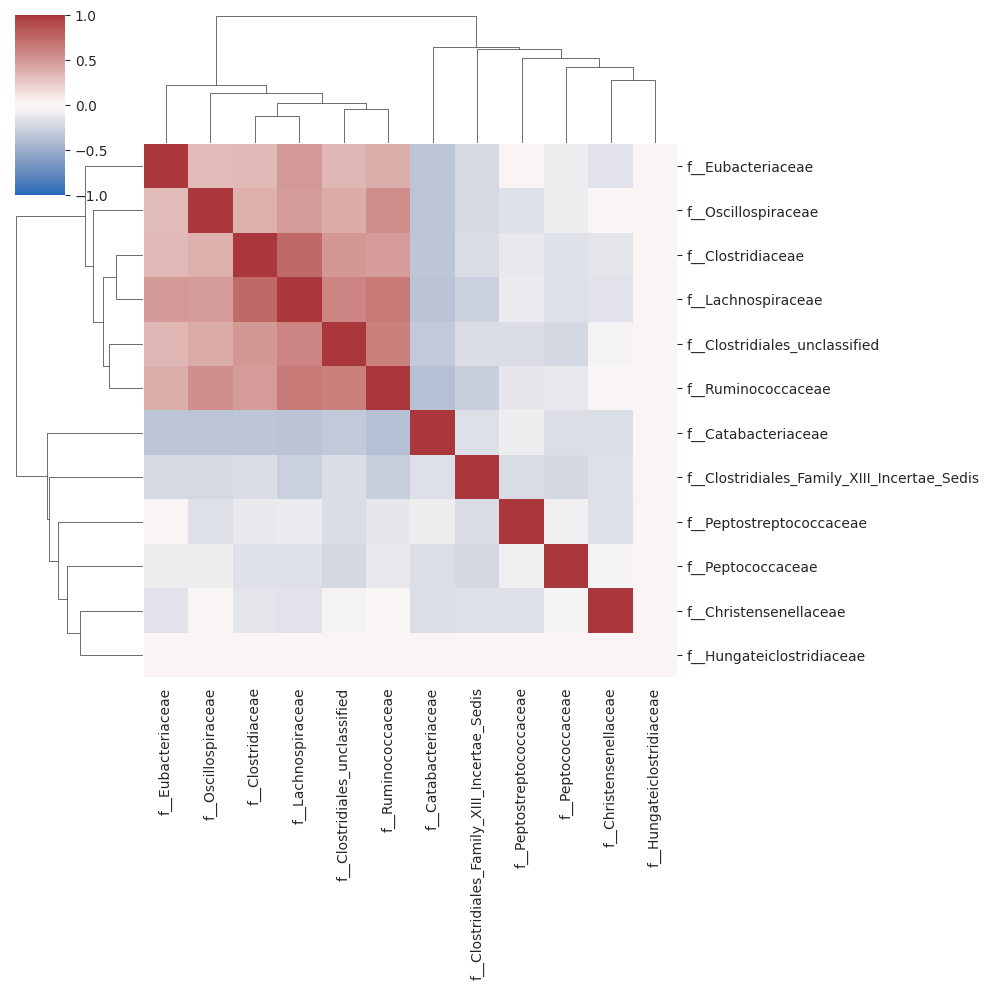

In [9]:
import seaborn as sns
df.columns = df.columns.str.split('|').str[-1]
rho = clr(df).corr(method='spearman').fillna(0)
sns.clustermap(rho, cmap='vlag', vmin=-1, vmax=1)

# Alpha diversity vs. BMI

Alpha diversity refers to the variety and abundance of species within a specific ecological community or sample. It measures the richness (number of different species) and evenness (distribution of individuals among those species) in a given environment, providing insight into the ecosystem's health and complexity. Here we use Shannon Entropy to compute alpha diversity.

In [10]:
# compute alpha diversity
from scipy.stats import entropy

def shannon_entropy(x):
    return entropy(x, base=2)

alpha = data.fillna(0).apply(lambda x: shannon_entropy(x), axis=1).to_frame('alpha_diversity')

<Axes: xlabel='alpha_diversity', ylabel='Count'>

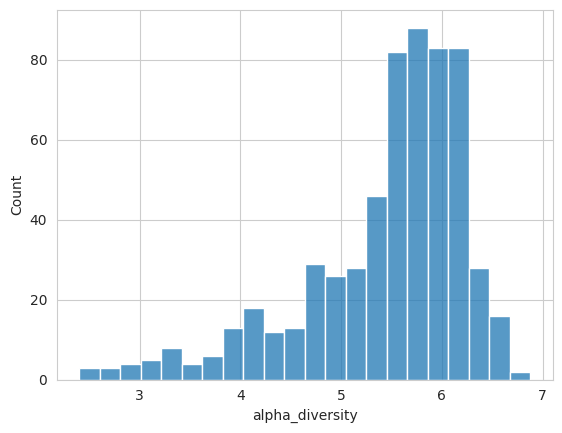

In [11]:
sns.histplot(alpha['alpha_diversity'])

The results below suggest that an increase of 1 unit in strain diversity is associated with a decrease of 0.72 in BMI. We include sex and age as covariates.

In [15]:
import statsmodels.api as sm

# load BMI from the anthropometrics dataset
bmi_data = PhenoLoader('anthropometrics', base_path='s3://pheno-synthetic-data/data')[['bmi', 'age', 'sex']]
bmi_data['sex'].replace({'Female': 0, 'Male': 1}, inplace=True)

features = alpha.join(bmi_data).dropna()
X = features[['age', 'sex', 'alpha_diversity']]
y = features['bmi']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.073
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.103
Time:                        15:26:03   Log-Likelihood:                -1719.1
No. Observations:                 599   AIC:                             3446.
Df Residuals:                     595   BIC:                             3464.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.9752      1.763     

# Alpha diversity vs. sex / age

We will use built-in plots from `pheno-utils`.

In [16]:
from pheno_utils.basic_plots import hist_ecdf_plots
from pheno_utils.age_reference_plots import GenderAgeRefPlot

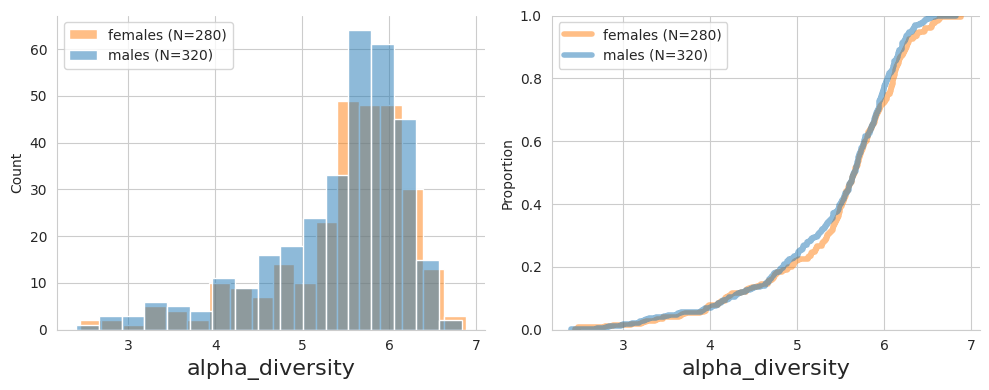

In [17]:
plot_df = alpha.join(pl[['age', 'sex']])

hist_ecdf_plots(plot_df, 'alpha_diversity', gender_col='sex')

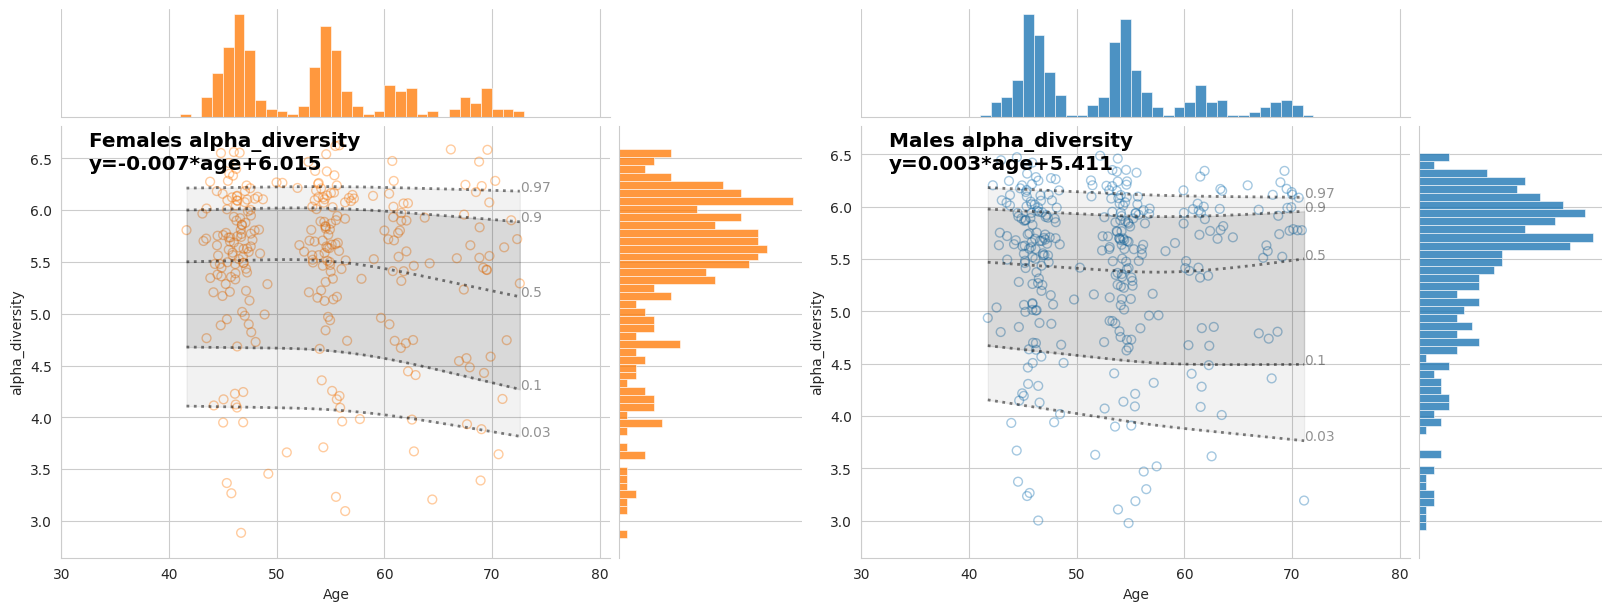

In [18]:
gender_refplots = GenderAgeRefPlot(plot_df, 'alpha_diversity', age_col='age')
gender_refplots.plot()